# Demo: HRES T0

In [1]:
import warnings

warnings.filterwarnings("ignore")  # Silence warnings in this demo.

In [2]:
from datetime import datetime

from aurora.foundry.demo.hres_t0_data import load_batch

initial_condition = load_batch(day=datetime(2022, 5, 11))

In [3]:
import logging
import os

from aurora.foundry import BlobStorageChannel, FoundryClient, submit

# Show what's happening!
logging.basicConfig(
    level=logging.INFO,
    format="%(asctime)s [%(levelname)s] %(message)s",
    handlers=[logging.StreamHandler()],
    force=True,
)

foundry_client = FoundryClient(
    endpoint=os.environ["FOUNDRY_ENDPOINT"],
    token=os.environ["FOUNDRY_TOKEN"],
)
channel = BlobStorageChannel(os.environ["BLOB_URL_WITH_SAS"])

predictions = list(
    submit(
        initial_condition,
        model_name="aurora-0.25-finetuned",
        num_steps=4,
        foundry_client=foundry_client,
        channel=channel,
    )
)

2025-01-10 15:52:44,690 [INFO] Created task `405b219d-6cc5-4eca-b397-ad5f600e88da` at endpoint.
2025-01-10 15:52:44,692 [INFO] Uploading initial condition.
2025-01-10 15:54:09,879 [INFO] Task status update: Queued
2025-01-10 15:54:16,912 [INFO] Task status update: Running
2025-01-10 15:54:45,086 [INFO] Task progress update: 25%.
2025-01-10 15:54:59,139 [INFO] Task progress update: 50%.
2025-01-10 15:55:13,204 [INFO] Task progress update: 75%.
2025-01-10 15:55:20,279 [INFO] Task progress update: 100%.
2025-01-10 15:55:24,403 [INFO] Task status update: Successfully completed
2025-01-10 15:55:24,404 [INFO] Task has been successfully completed!
2025-01-10 15:55:24,404 [INFO] Retrieving predictions.
2025-01-10 15:56:21,104 [INFO] All predictions have been retrieved.


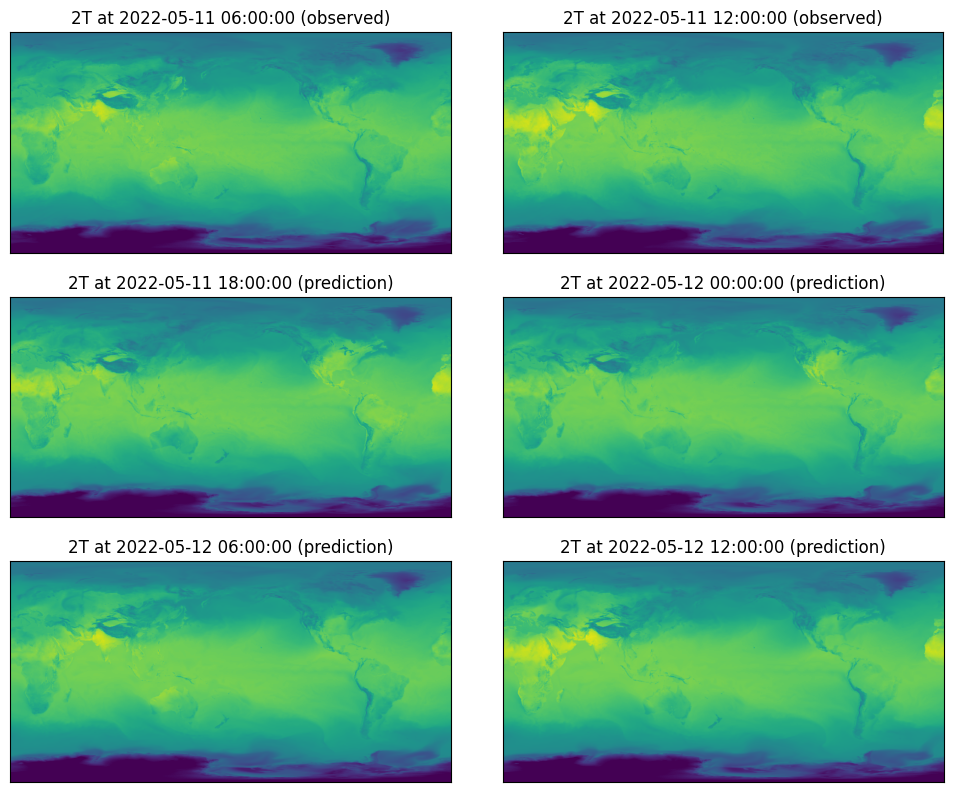

In [4]:
from datetime import timedelta

import matplotlib.pyplot as plt

fig, axs = plt.subplots(3, 2, figsize=(10, 8))

ax = axs[0, 0]
ax.imshow(initial_condition.surf_vars["2t"][0, 0].numpy() - 273.15, vmin=-50, vmax=50)
ax.set_title(f"2T at {initial_condition.metadata.time[0] - timedelta(hours=6)} (observed)")
ax.set_xticks([])
ax.set_yticks([])

ax = axs[0, 1]
ax.imshow(initial_condition.surf_vars["2t"][0, 1].numpy() - 273.15, vmin=-50, vmax=50)
ax.set_title(f"2T at {initial_condition.metadata.time[0]} (observed)")
ax.set_xticks([])
ax.set_yticks([])

for i in range(2, 6):
    pred = predictions[i - 2]

    ax = axs[i // 2, i % 2]
    ax.imshow(pred.surf_vars["2t"][0, 0].numpy() - 273.15, vmin=-50, vmax=50)
    ax.set_title(f"2T at {pred.metadata.time[0]} (prediction)")
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.subplots_adjust(hspace=0.2)